 # Diabetes prediction dataset Classification

 ## 1. Data upload and first study

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn

In [2]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Diabetes prediction dataset Classification/diabetes_prediction_dataset.csv')

In [3]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


 #### Colclusion: at first blush we observe a normal disribution of data¶

 ## 2. Analysis of data

 #### Check duplicates

In [7]:
df.duplicated().sum()

3854

In [8]:
df.drop_duplicates(inplace=True)

  #### Build histogram for every column

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']] # choice all features
num_cols = 3 # Amount of columns
num_rows = 3 # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

In [12]:
# Explore column "gender"
print(df.gender.value_counts())

# Delete from column "gender" a values "Other"
df = df[df['gender']!='Other']

# Check
print(df.gender.value_counts())

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64
gender
Female    56161
Male      39967
Name: count, dtype: int64


 #### Build box-plots for every numerical columns

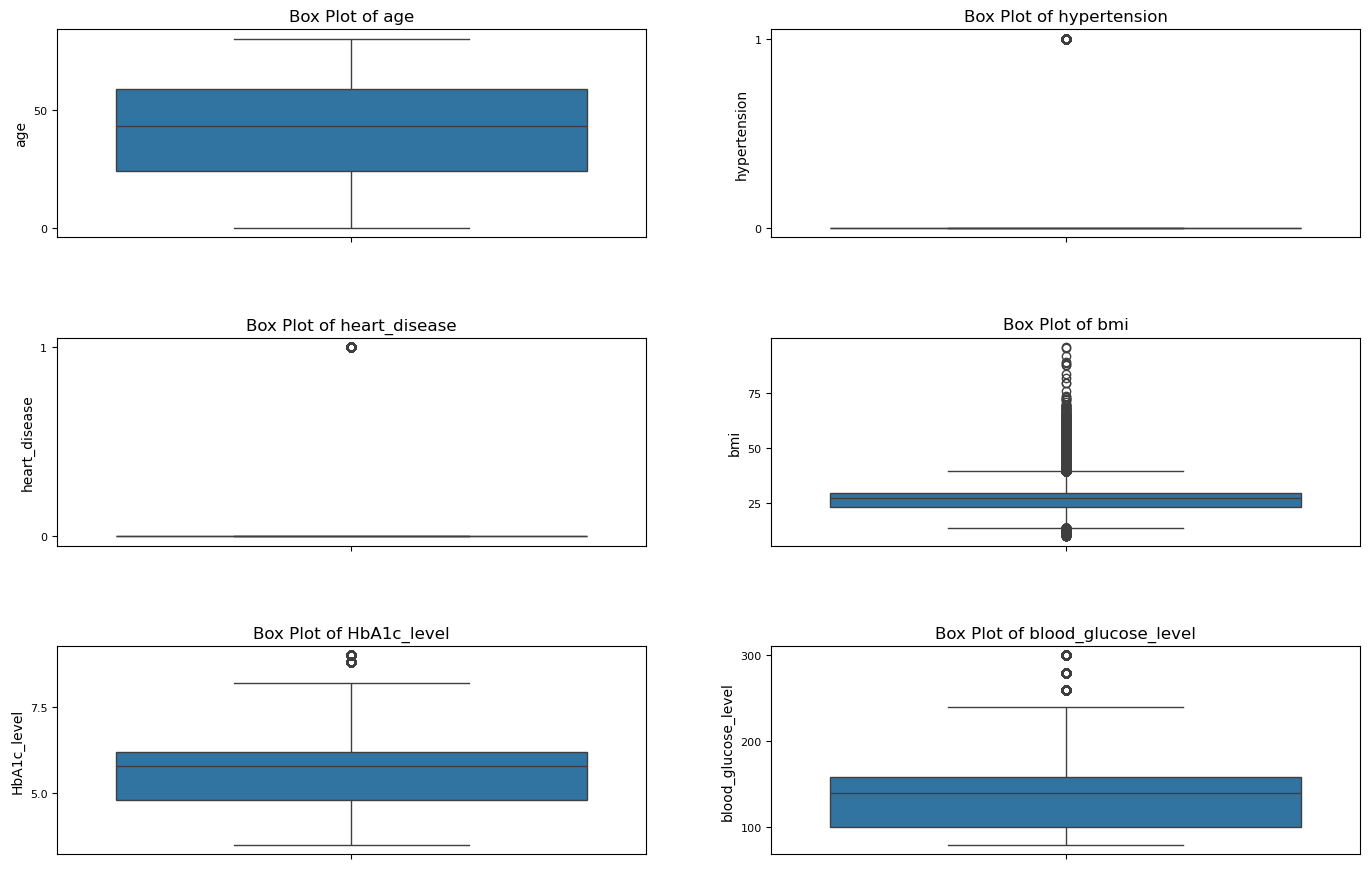

In [22]:
# Creating box plots for each numerical feature
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Decrease font size of the title
    plt.ylabel(feature, fontsize=10)  # Decrease font size of the Y-axis label
    plt.xlabel('')  # Remove X-axis label if not needed
    
    # Decrease font size of axis tick labels
    plt.xticks(fontsize=8)  # Font size of X-axis tick labels
    plt.yticks(fontsize=8)  # Font size of Y-axis tick labels

plt.tight_layout()
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_5551/3949078326.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


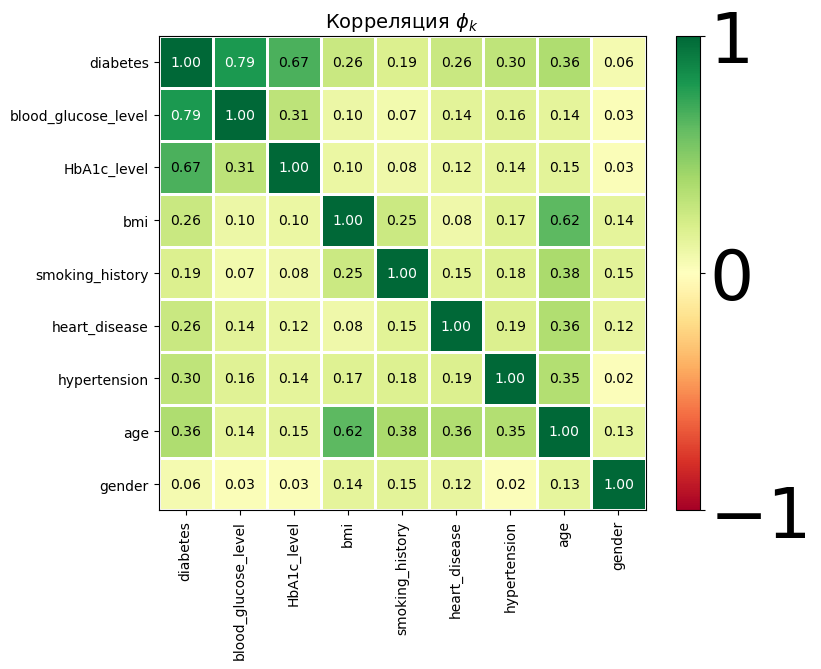

In [25]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(10, 8)
)

 #### Droppping outlier data

In [28]:
numerical_columns = ['blood_glucose_level','HbA1c_level','bmi','age']

In [30]:
for column in numerical_columns:

  Q1 = df[column].quantile(0.25)

  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR

  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

 ## Data preparation

 ### Prepare numerical and categorial columns

In [34]:
# Reform categorial data
df = pd.get_dummies(df, drop_first=True)

# Select a features and target
features = df.drop(['diabetes'], axis=1)
target = df['diabetes']

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data diabetes
0    66683
1    66529
Name: count, dtype: int64

Test data diabetes
1    16729
0    16575
Name: count, dtype: int64


 #### Write the function for metrics

In [37]:
def metrics(predictions, target):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc = roc_auc_score(target, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model 

In [40]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            logistic_regres = metrics(predictions, target_test)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 0.8962887340859956, 'precision': 0.8886806816185513, 'recal': 0.9071671946918525, 'f1': 0.8978287877891499, 'roc': 0.8962381976475855}


 #### Train DecisionTree Model

In [43]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions)
    #print(depth, result)
    if best_result < result:
        dec_tree = metrics(predictions, target_test)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=1
Test data {'accuracy': 0.7407818880614941, 'precision': 0.6642323920804933, 'recal': 0.9786598123019905, 'f1': 0.7913575174613916, 'roc': 0.739676814144962}


 #### Train Randomforest Model

In [45]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if best_result < result:
            rand_forest = metrics(predictions, target_test)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=5, est=10
Test data {'accuracy': 0.9042757626711506, 'precision': 0.8699524616141194, 'recal': 0.9517006396078665, 'f1': 0.9089922923208679, 'roc': 0.9040554480090615}


 #### Train KNeighborsClassifier model

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

best_result, best_n_neighbors, best_metric = 0, 0, ''
knn = None

# Перебор параметров
for n_neighbors in range(1, 21):  # Перебор от 1 до 20 соседей
    for metric in ['euclidean', 'manhattan', 'minkowski']:  # Разные метрики
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        
        if best_result < result:
            knn = metrics(predictions, target_test)
            best_n_neighbors = n_neighbors
            best_metric = metric
            best_result = result

print(f'The best parameters: n_neighbors={best_n_neighbors}, metric={best_metric}')
print('Test data metrics:', knn)

The best parameters: n_neighbors=3, metric=manhattan
Test data metrics: {'accuracy': 0.9524681719913524, 'precision': 0.9338833505213705, 'recal': 0.9743559089007113, 'f1': 0.9536904309159524, 'roc': 0.9523664914035985}


 #### Train XGBlassifier

In [50]:
from xgboost import XGBClassifier

best_result, best_depth, best_est, best_learning_rate = 0, 0, 0, 0

xgb = None
pos_weight = sum(target_train == 0) / sum(target_train == 1)

for est in range(10, 110, 10):
    for depth in range(1, 10):
        for learning_rate in [0.01, 0.1, 0.2]:  
            model = XGBClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                learning_rate=learning_rate,
                scale_pos_weight=pos_weight
            )
            model.fit(features_train, target_train)
            predictions = model.predict(features_test)
            result = recall_score(target_test, predictions)
            
            if best_result < result:
                xgb = metrics(predictions, target_test)
                best_depth = depth
                best_est = est
                best_learning_rate = learning_rate
                best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}, learning_rate={best_learning_rate}')
print('Best F1 Score:', xgb)

The best parameters: depth=1, est=10, learning_rate=0.01
Best F1 Score: {'accuracy': 0.7396108575546481, 'precision': 0.6637002722581169, 'recal': 0.9763285312929643, 'f1': 0.7902172335381489, 'roc': 0.738511173640449}


 #### Train LGBMregressor Model

In [52]:
best_est = 0
best_result = 0
best_depth = 0
lgbm = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = LGBMClassifier(random_state=12345, max_depth=depth, num_leaves=31, n_estimators=est, learning_rate=0.2, boosting_type='gbdt', verbose=-1) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        #print(est, depth, result)
        if result > best_result:
            lgbm = metrics(predictions, target_test)
            best_est = est
            best_depth = depth
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', lgbm)

The best parameters: depth=1, est=10
Test data {'accuracy': 0.9776603411001682, 'precision': 0.9871990246875952, 'recal': 0.9680793831071791, 'f1': 0.977545723426088, 'roc': 0.9777048499246305}


 #### Train Catboost Model

In [54]:
best_est = 0
best_result = 0
best_depth = 0
cat_boost = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = CatBoostClassifier(random_state=12345, max_depth=depth, n_estimators=est, learning_rate=0.2, verbose=0) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
            cat_boost = metrics(predictions, target_test)

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', cat_boost)

The best parameters: depth=1, est=10
Test data {'accuracy': 0.9776603411001682, 'precision': 0.9871990246875952, 'recal': 0.9680793831071791, 'f1': 0.977545723426088, 'roc': 0.9777048499246305}


 ## Conclusion

In [55]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest, lgbm, cat_boost, xgb, knn]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'LGBM', 'CatBoost', 'XGBClassifier', 'KNeighborsClassifier'])
print(total.sort_values(by='accuracy', ascending=False))

                      accuracy  precision     recal        f1       roc
LGBM                  0.977660   0.987199  0.968079  0.977546  0.977705
CatBoost              0.977660   0.987199  0.968079  0.977546  0.977705
KNeighborsClassifier  0.952468   0.933883  0.974356  0.953690  0.952366
RandomForest          0.904276   0.869952  0.951701  0.908992  0.904055
LogisticRegression    0.896289   0.888681  0.907167  0.897829  0.896238
DecisionTree          0.740782   0.664232  0.978660  0.791358  0.739677
XGBClassifier         0.739611   0.663700  0.976329  0.790217  0.738511


 ## Improving metrics

 ### Catboost optimized with optuna

In [57]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define ranges for hyperparameters
    iterations = trial.suggest_int('iterations', 1000, 2000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    depth = trial.suggest_int('depth', 4, 12)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True)
    random_strength = trial.suggest_float('random_strength', 1e-5, 10)
    border_count = trial.suggest_int('border_count', 1, 255)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0, 10)

    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_strength=random_strength,
        border_count=border_count,
        bagging_temperature=bagging_temperature,
        verbose=0
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Use the validation set
    accuracy = accuracy_score(target_test, y_pred)

    return accuracy

# Create an Optuna study object
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Get the best parameters
best_params = study.best_params
print(best_params)

[I 2025-04-02 17:19:48,505] A new study created in memory with name: no-name-f431b5b1-e346-4607-a40f-ceb9f40c76de
[I 2025-04-02 17:20:11,982] Trial 0 finished with value: 0.979732164304588 and parameters: {'iterations': 1642, 'learning_rate': 0.01886160307511857, 'depth': 9, 'l2_leaf_reg': 9.397936590552282, 'random_strength': 3.8772358264059004, 'border_count': 234, 'bagging_temperature': 3.600138180075599}. Best is trial 0 with value: 0.979732164304588.
[I 2025-04-02 17:20:18,780] Trial 1 finished with value: 0.9674813836175835 and parameters: {'iterations': 1018, 'learning_rate': 0.011610296236838688, 'depth': 4, 'l2_leaf_reg': 5.8533788889214326e-05, 'random_strength': 7.971209854606478, 'border_count': 146, 'bagging_temperature': 3.2338596136996856}. Best is trial 0 with value: 0.979732164304588.
[I 2025-04-02 17:20:40,580] Trial 2 finished with value: 0.9787713187605093 and parameters: {'iterations': 1058, 'learning_rate': 0.012192520876078894, 'depth': 10, 'l2_leaf_reg': 0.00313

{'iterations': 1249, 'learning_rate': 0.03312622098036867, 'depth': 11, 'l2_leaf_reg': 0.01685925518494523, 'random_strength': 8.121159517420317, 'border_count': 225, 'bagging_temperature': 5.81084758747002}


In [62]:
model = CatBoostClassifier(

    iterations=1708,

    learning_rate=0.033868905481810534,

    depth=10,

    l2_leaf_reg=0.007753121454077926,

    random_strength=1.617492980868898,

    border_count=205,

    bagging_temperature=4.758927608638676,
    verbose=0

)



model.fit(features_train, target_train)

y_pred = model.predict(features_test)

accuracy = accuracy_score(target_test, y_pred)

total_metrics = metrics(y_pred, target_test)

print(f"Accuracy of CatBoost model with specified parameters: {accuracy}")
print(f"All metrics: {total_metrics}")

0:	learn: 0.6029714	total: 28.9ms	remaining: 49.4s
1:	learn: 0.5323910	total: 52.2ms	remaining: 44.5s
2:	learn: 0.4774291	total: 73.9ms	remaining: 42s
3:	learn: 0.4331982	total: 97.5ms	remaining: 41.5s
4:	learn: 0.3950476	total: 120ms	remaining: 41s
5:	learn: 0.3544253	total: 144ms	remaining: 40.8s
6:	learn: 0.3318223	total: 167ms	remaining: 40.5s
7:	learn: 0.3032729	total: 188ms	remaining: 40s
8:	learn: 0.2868253	total: 209ms	remaining: 39.4s
9:	learn: 0.2674697	total: 231ms	remaining: 39.2s
10:	learn: 0.2508409	total: 252ms	remaining: 38.9s
11:	learn: 0.2346887	total: 274ms	remaining: 38.7s
12:	learn: 0.2236197	total: 296ms	remaining: 38.6s
13:	learn: 0.2142797	total: 318ms	remaining: 38.4s
14:	learn: 0.2048984	total: 341ms	remaining: 38.5s
15:	learn: 0.1986343	total: 361ms	remaining: 38.2s
16:	learn: 0.1940322	total: 383ms	remaining: 38.1s
17:	learn: 0.1880250	total: 404ms	remaining: 38s
18:	learn: 0.1801422	total: 426ms	remaining: 37.9s
19:	learn: 0.1710601	total: 447ms	remaining: 

 #### KNeighbors optimized with optuna

In [64]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define ranges for hyperparameters
    iterations = trial.suggest_int('iterations', 1000, 2000)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    depth = trial.suggest_int('depth', 4, 12)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True)
    random_strength = trial.suggest_float('random_strength', 1e-5, 10)
    border_count = trial.suggest_int('border_count', 1, 255)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0, 10)

    model = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_strength=random_strength,
        border_count=border_count,
        bagging_temperature=bagging_temperature,
        verbose=0
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Use the validation set
    accuracy = accuracy_score(target_test, y_pred)

    return accuracy

# Create an Optuna study object
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Get the best parameters
best_params = study.best_params
print(best_params)

[I 2024-11-13 22:42:21,567] A new study created in memory with name: no-name-4e543580-75b9-4c3b-beb0-0a946aa9cccd
[I 2024-11-13 22:42:47,658] Trial 0 finished with value: 0.944451116982945 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 10, 'p': 1}. Best is trial 0 with value: 0.944451116982945.
[I 2024-11-13 22:42:49,521] Trial 1 finished with value: 0.948804948354552 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 12, 'p': 2}. Best is trial 1 with value: 0.948804948354552.
[I 2024-11-13 22:42:53,919] Trial 2 finished with value: 0.9490451597405717 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 41, 'p': 1}. Best is trial 2 with value: 0.9490451597405717.
[I 2024-11-13 22:42:58,257] Trial 3 finished with value: 0.9433701657458563 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 40, 'p': 1}. Best is trial

{'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 20, 'p': 2}


In [69]:
KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

model = KNeighborsClassifier(

    n_neighbors=1,

    weights='uniform',

    algorithm='brute',

    leaf_size=20,

    p=2

)



model.fit(features_train, target_train)

y_pred = model.predict(features_test)

accuracy = accuracy_score(target_test, y_pred)

total_metrics = metrics(y_pred, target_test)

print(f"Accuracy of CatBoost model with specified parameters: {accuracy}")
print(f"All metrics: {total_metrics}")

Accuracy of CatBoost model with specified parameters: 0.9542397309632477
All metrics: {'accuracy': 0.9542397309632477, 'precision': 0.9402907279782243, 'recal': 0.9705302169884632, 'f1': 0.9551711966113661, 'roc': 0.9541640526872934}
